**Agrupamento - Mineração de Dados**


**Nome: Davi Augusto Neves Leite**

**Data de Entrega: 31/10/2023**


---


# **Materiais**


Os principais recursos para a execução desta atividade podem ser vistos a seguir.

1. **Software**

- Sistemas Operacionais: Windows 11 para _desktop_;
- Ambiente de Desenvolvimento Integrado: Microsoft Visual Studio Code;
- Linguagem de Programação: Python 3.12.0 64-bit.

2. **Hardware**

- Notebook pessoal Lenovo Ideapad 330-15IKB com: processador Intel Core i7-8550U, HDD WD Blue WD10SPZX de 1TB, SSD Crucial BX500 de 1TB, 12 GB DDR4 de Memória RAM e placa de vídeo NVIDIA GeForce MX150 (2 GB GDDR5 de memória).


---


# **Instalação das Bibliotecas Principais**

Nota: ao decorrer deste Notebook, outras bibliotecas podem ser utilizadas em quaisquer respectiva seção/conjunto de dados, dependendo da necessidade. Abaixo, há a instalação das principais que são comuns e utilizadas em todas ou quase todas seções/conjunto de dados.


In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


---


# **Importação das Bibliotecas Principais**

Nota: ao decorrer deste Notebook, outras bibliotecas podem ser utilizadas em quaisquer respectiva seção/conjunto de dados, dependendo da necessidade. Abaixo, há a importação das principais que são comuns e utilizadas em todas ou quase todas seções/conjunto de dados.


In [2]:
import numpy as np  # Manipulação de listas
import pandas as pd  # Manipulação de tabelas
import seaborn as sns  # Geração de gráficos estatísticos
import plotly.express as px  # Outro para geração de gráficos
import matplotlib.pyplot as plt  # Geração de gráficos de listas
import sklearn as skl  # Biblioteca para pré-processamento
from copy import copy as cp  # Possibilitar copiar os objetos

# Ignorar os avisos não importantes durante a execução deste notebook
import warnings

warnings.filterwarnings("ignore")

---


# **Conjunto de Dados: _Fashion MNIST_**


**Descrição do Dataset:** este conjunto é composto por **70 mil imagens** a respeito de **10 peças de roupas distintas**. Cada imagem possui a **resolução de 28x28 (784 pixels) em escala de cinza e 256 níveis de cinza**. Desse total, exitem **7000 imagens** para cada uma das peças de roupas, ou classes.

Cada classe pode ser vista a seguir.

1. Camiseta
2. Calça
3. Pulôver
4. Vestido
5. Casaco
6. Sandália
7. Camisa
8. Tênis
9. Bolsa
10. Bota de Tornozelo

Este conjunto de dados pode ser acessado por meio de: [Fashion MNIST](https://www.openml.org/search?type=data&status=active&id=40996)
(última data de acesso: 30 de out. de 2023).


## **Importação da Base de Dados**


Para importar as imagens, utiliza-se o módulo **scikit-learn** capaz de carregar diversas bases de dados através do portal **OpenML**, o qual essa base de dados está disponível online.


In [3]:
# Importação da função necessária para importação de base de dados OpenML
from sklearn.datasets import fetch_openml

# Carrega as imagens e suas classes separadamente
data, classes = fetch_openml(
    "Fashion-MNIST", return_X_y=True, as_frame=True, parser="auto"
)

# Conversão das imagens para NumPy
data = data.to_numpy()
classes = classes.to_numpy().astype(int)

# Criação de um dicionário com os rótulos das classes para fácil acesso
labels_desc = {
    0: "camiseta",
    1: "calca",
    2: "pulover",
    3: "vestido",
    4: "casaco",
    5: "sandalia",
    6: "camisa",
    7: "tenis",
    8: "bolsa",
    9: "bota",
}
labels_names = [
    "Camiseta",
    "Calça",
    "Pulôver",
    "Vestido",
    "Casaco",
    "Sandália",
    "Camisa",
    "Tênis",
    "Bolsa",
    "Bota de Tornozelo",
]

## **Pré-Processamento dos Dados**


### Exibição das Classes de Interesse

Abaixo, é possível visualizar uma amostra de cada classe, por meio do **matplotlib**.


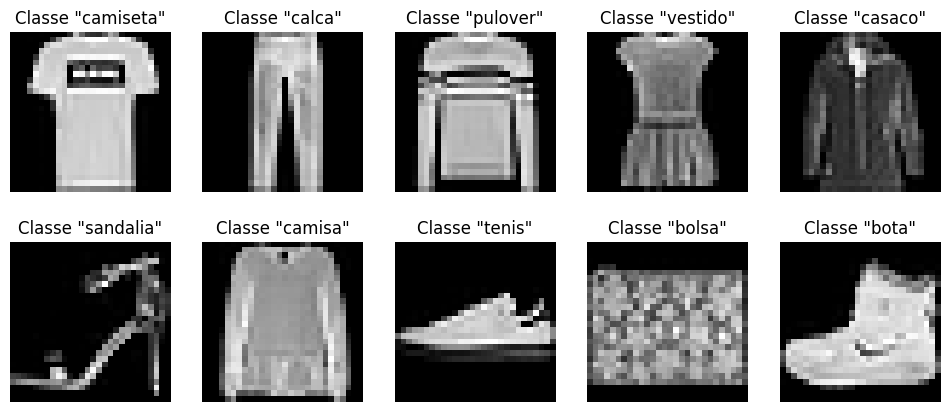

In [4]:
# Selecionando um índice de cada classe
idx_example_images = np.arange(10)

# Definindo o tamanho da figura
plt.figure(figsize=(12, 5))

# Definindo o número de linhas e colunas das subfiguras
fig_n_rows = 2
fig_n_cols = 5

# Mostrando as amostras de cada classe
for label, image_idx in enumerate(idx_example_images):
    plt.subplot(fig_n_rows, fig_n_cols, label + 1)
    plt.title(f'Classe "{labels_desc[label]}"')
    plt.imshow(data[classes == image_idx][0].reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.show()

### Tratamento de Dados Perdidos ou Inexistentes (NaN)


Para verificar se algum dado está faltando, **caso não seja indicado pela descrição do _dataset_**, pode ser realizado a seguinte operação de força-bruta:


In [5]:
# Verificando o número de dados faltantes a partir do NumPy
missing_image = np.isnan(data)
missing_image = np.sum(missing_image)
print("Número de Dados Perdidos: {0}".format(missing_image))

Número de Dados Perdidos: 0


Como é possível ver, não há nenhum dado perdido neste _dataset_ e, desta forma, não é necessário realizar nenhum método de tratamento neste contexto.


### Normalização dos Dados


Para normalizar os dados via _Standardization (Z-Score)_ deste **dataset**, basta aplicar as seguintes operações:


In [6]:
# Função responsável pela normalização via Z-Score
from sklearn.preprocessing import StandardScaler

# Mostrando os dados não normalizados
print("Dados Não Normalizados")
print("\tMédia: {0} | Desvio-Padrão: {1}".format(np.mean(data), np.std(data)))
print(data)


# Aplicando a Normalização com Z-Score
data = StandardScaler().fit_transform(data)
print("\n")

# Mostrando os dados normalizados
print("Dados Normalizados com Z-Score")
print("\tMédia: {0} | Desvio-Padrão: {1}".format(np.mean(data), np.std(data)))
print(data)

Dados Não Normalizados
	Média: 72.96981142492712 | Desvio-Padrão: 90.00009426846664
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Dados Normalizados com Z-Score
	Média: -5.591510409852669e-18 | Desvio-Padrão: 1.0
[[-0.00883265 -0.02162585 -0.0287172  ... -0.15825699 -0.09035386
  -0.03423352]
 [-0.00883265 -0.02162585 -0.0287172  ... -0.15825699 -0.09035386
  -0.03423352]
 [-0.00883265 -0.02162585 -0.0287172  ... -0.15825699 -0.09035386
  -0.03423352]
 ...
 [-0.00883265 -0.02162585 -0.0287172  ... -0.15825699 -0.09035386
  -0.03423352]
 [-0.00883265 -0.02162585 -0.0287172  ... -0.15825699 -0.09035386
  -0.03423352]
 [-0.00883265 -0.02162585 -0.0287172  ... -0.15825699 -0.09035386
  -0.03423352]]


### Redução de Dimensionalidade: _Principal Component Analysis_


Para reduzir a dimensionalidade deste **dataset**, é recomendado o uso do _Principal Component Analysis_ (PCA). Desta forma:


In [7]:
# Importação da função do PCA do sklearn
from sklearn.decomposition import PCA

# Definindo o número de componentes do PCA
n_components = 2

# Aplicando o PCA
pca = PCA(n_components=n_components, copy=True, whiten=False)
data_pca = pca.fit_transform(data)

# Mostrando os dados projetados com PCA
print("Dados Projetados com PCA")
print(data_pca)
print("\n")

# Segundo: mostrando a matriz de covariância do PCA
print("Variâncias")
print(pca.explained_variance_ratio_)

Dados Projetados com PCA
[[ -0.82469513  20.86260447]
 [ 17.07338982  -4.96621704]
 [ -9.60003596 -12.32192784]
 ...
 [ -6.99353047  -8.48864652]
 [ -2.89228539 -15.37646686]
 [-17.53224758   0.12483318]]


Variâncias
[0.22092292 0.14402605]


---


## **Agrupamento**


O agrupamento, também conhecido por **clusterização**, consiste numa técnica de **aprendizado de máquina não supervisionado** cujo objetivo está em separar os dados por meio de conjuntos distintos entre si (**_clusters_**). Estes conjuntos, em outras palavras, tentam descrever os dados e suas relações uns com os outros.

Os principais algoritmos para clusterização são: **_K-means_**, **_DBSCAN_** e **_Hierarchical Clustering_**. Cada um será aplicado para o agrupamento das classes do **_Fashion MNIST_** e testados com **diferentes configurações** de execução. Por fim, para avaliação dos resultados, será levado em conta o **_Silhouette Score_** e o **SSE** como índice interno e **Adjusted Rand Score** e **_Entropy_** como índice externo, quando aplicável. O primeiro combina a ideia de coesão e separação tanto para pontos individuais quanto para os _clusters_, sem utilizar informações externas (não supervisionado). O segundo, por sua vez, busca agrupar os dados se baseando nas informações externas dos rótulos das classes (supervisionado).


### _K-Means_


Consiste em uma abordagem para clusterização particional, em que cada cluster é associado a um ponto de centro (centroide). A partir dos centroides, cada ponto (dado) é atribuído ao mais próximo. Essa distância geralmente é medida ou pela função de _Manhattan_ ou pela _Distância Euclidiana_.


In [8]:
# Importação do K-Means do scikit-learn e métricas
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Definindo condições experimentais
exp_n_clusters = np.arange(start=2, stop=11)  # 2 ao 10

# Dados do Índice Interno
silhouette_scores = []  # Silhouette Scores
sse_scores = []  # Soma dos Erros Quadráticos

# Percorrendo as condições experimentais
for n_clusters in exp_n_clusters:
    # Aplicando o K-Means para o dataset
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_pca)

    # Recuperando os dados do Índice Interno
    silhouette_avg = silhouette_score(data_pca, kmeans_labels)
    silhouette_scores.append((n_clusters, silhouette_avg))
    sse_scores.append((n_clusters, kmeans.inertia_))

   Clusters  Silhueta
0         2  0.404347
1         3  0.430172
2         4  0.452298
3         5  0.414716
4         6  0.438175
5         7  0.423705
6         8  0.422201
7         9  0.402861
8        10  0.397356


Text(0.5, 1.0, 'Índice Interno: Silhouette Scores')

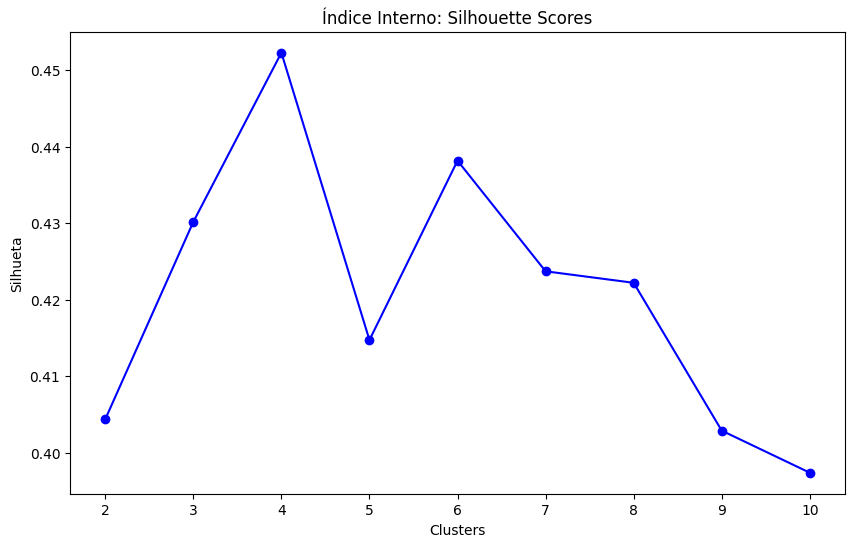

In [9]:
# Mostrando os resultados do Índice Interno: Silhouette Scores
df_silhouette_scores = pd.DataFrame(silhouette_scores)
df_silhouette_scores.columns = ["Clusters", "Silhueta"]
print(df_silhouette_scores)
plt.figure(figsize=(10, 6))
plt.plot(
    df_silhouette_scores["Clusters"],
    df_silhouette_scores["Silhueta"],
    marker="o",
    linestyle="-",
    color="b",
)

# Definindo os marcadores do eixo X para mostrar somente inteiros
plt.xticks(df_silhouette_scores["Clusters"][::1])
plt.xlabel("Clusters")
plt.ylabel("Silhueta")
plt.title("Índice Interno: Silhouette Scores")

   Clusters           SSE
0         2  1.129777e+07
1         3  6.889443e+06
2         4  4.538107e+06
3         5  3.665876e+06
4         6  3.097131e+06
5         7  2.555915e+06
6         8  2.121732e+06
7         9  1.906219e+06
8        10  1.698282e+06


Text(0.5, 1.0, 'Índice Interno: SSE')

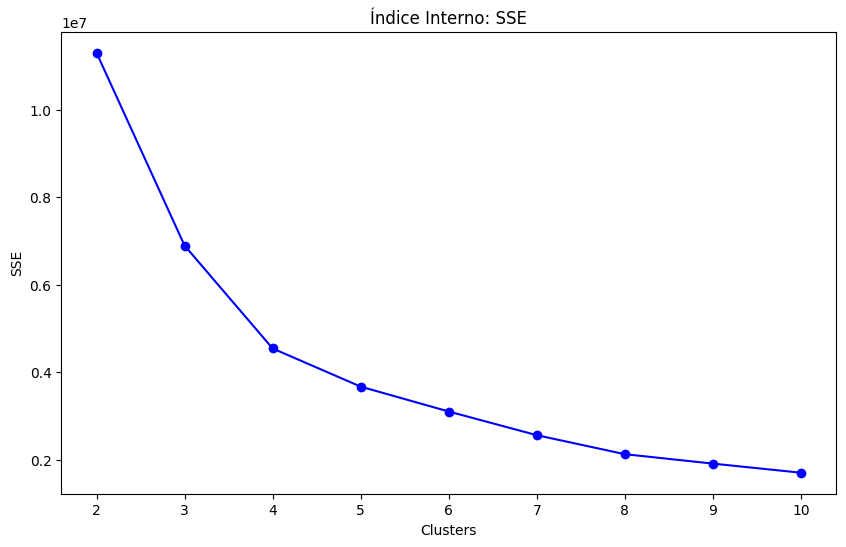

In [10]:
# Mostrando os resultados do Índice Interno: SSE
df_sse_scores = pd.DataFrame(sse_scores)
df_sse_scores.columns = ["Clusters", "SSE"]
print(df_sse_scores)
plt.figure(figsize=(10, 6))
plt.plot(
    df_sse_scores["Clusters"],
    df_sse_scores["SSE"],
    marker="o",
    linestyle="-",
    color="b",
)

# Definindo os marcadores do eixo X para mostrar somente inteiros
plt.xticks(df_sse_scores["Clusters"][::1])
plt.xlabel("Clusters")
plt.ylabel("SSE")
plt.title("Índice Interno: SSE")

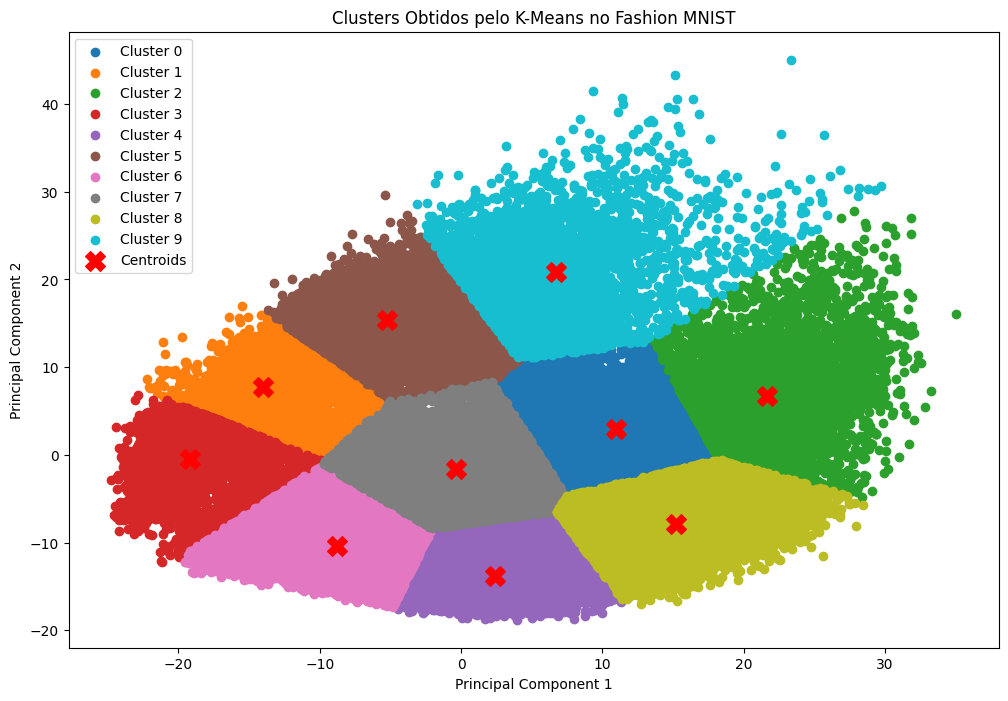

In [11]:
# Plotando os resultados baseados no componentes do PCA
plt.figure(figsize=(12, 8))

for i in range(n_clusters):
    plt.scatter(
        data_pca[kmeans_labels == i, 0],
        data_pca[kmeans_labels == i, 1],
        label=f"Cluster {i}",
    )

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker="X",
    color="red",
    s=200,
    label="Centroids",
)
plt.title("Clusters Obtidos pelo K-Means no Fashion MNIST")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

Como o _K-means_ é um algoritmo de clusterização do tipo não supervisionado, não é apropriado avaliá-lo por meio do índice externo, como Entropia.


### _DBSCAN_


Consiste em uma abordagem de clusterização baseada na **densidade**, onde os clusters são identificados pela proximidade dos dados, em vez de assumir um número fixo de clusters. Ele começa selecionando aleatoriamente um ponto no conjunto de dados e expande o cluster associado a esse ponto, incluindo pontos vizinhos que estão a uma distância inferior a um valor chamado de '_eps_'. Esse processo é repetido até que todos os pontos do conjunto de dados sejam incluídos em algum cluster ou sejam marcados como ruído. O DBSCAN identifica naturalmente clusters de diferentes formas e tamanhos, sem depender de uma métrica de distância específica, como a Distância Euclidiana ou a Distância Manhattan.

Neste método, um ponto pode ser:

- **_Core Point_** (Ponto Central): Um ponto é um _core point_ se ele tiver pelo menos um número mínimo de pontos dentro de uma vizinhança de raio _eps_.
- **_Border Point_** (Ponto de Borda): Um ponto é um border point se ele estiver dentro da vizinhança de um _core point_, mas não é um _core point_ ele mesmo.
- **_Noise Point_** (Ponto de Ruído): Um ponto que não é nem um _core point_ nem um _border point_. Ou seja, é um ponto que não está perto o suficiente de nenhum _core point_ para ser incluído em um cluster.


In [12]:
# Importação do DBSCAN do scikit-learn e métricas
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

# Definindo condições experimentais
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [10, 20, 30]

# Dados do Índice Externo
adj_rand_scores = []  # Adjusted Rand Score

# Percorrendo as condições experimentais
for eps in eps_values:
    for min_samples in min_samples_values:
        # Aplicando o DBSCAN para o dataset
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(data_pca)

        # Recuperando os dados do Índice Externo
        adj_rand_score = adjusted_rand_score(classes, dbscan_labels)
        adj_rand_scores.append((eps, min_samples, adj_rand_score))

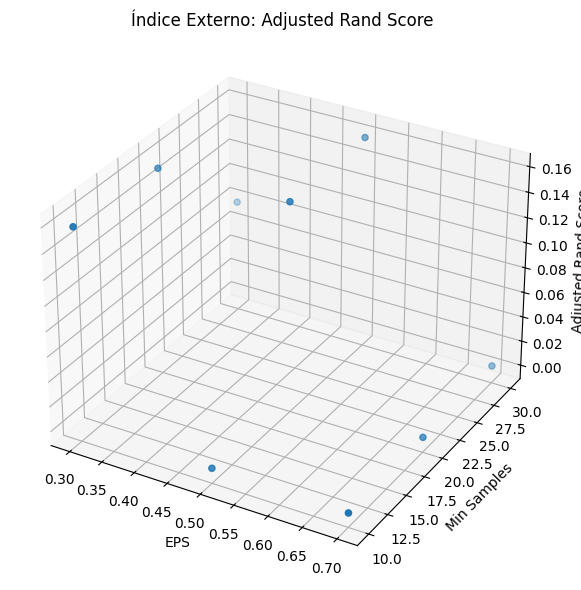

In [13]:
# Mostrando os resultados do Índice Externo: Adjusted Rand Score
eps_plt, min_samples_plt, adj_rand_plt = zip(*adj_rand_scores)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(eps_plt, min_samples_plt, adj_rand_plt)
ax.set_xlabel("EPS")
ax.set_ylabel("Min Samples")
ax.set_zlabel("Adjusted Rand Score")
plt.title("Índice Externo: Adjusted Rand Score")
plt.tight_layout()
plt.show()

### _Hierarchical Clustering_


Abordagem de clusterização hierárquica baseada na **proximidade**, onde os clusters são construídos iterativamente combinando os pontos mais próximos uns dos outros. Inicialmente, cada ponto no conjunto de dados é considerado como um cluster individual. Em seguida, os dois clusters mais próximos são mesclados em um novo cluster. Esse processo é repetido até que todos os pontos estejam agrupados em um único cluster grande.

Nesta técnica, a proximidade entre dois clusters é definida por uma métrica de distância, como a Distância Euclidiana ou a Distância Manhattan . O método de ligação (**_linkage method_**) é utilizado para determinar a distância entre dois clusters. Existem vários métodos de ligação, como '_ward_', '_complete_', '_average_', entre outros.

Durante o processo de fusão, gera-se uma árvore de clusters, conhecida como dendrograma, a qual mostra a ordem em que os clusters foram mesclados. Posteriormente, é possível cortar o dendrograma em diferentes níveis para obter diferentes quantidades de clusters, dependendo do critério ou necessidade.


In [14]:
# Importação do Hierarchical Clustering (Agglomerative) do scikit-learn e métricas
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.stats import entropy

# Definindo condições experimentais
exp_n_clusters = [2, 3]  # Número de clusters
linkage_methods = ["ward", "complete", "average"]  # Métodos de ligação

# Dados do Índice Externo: Entropia
entropy_scores = []  # Entropia

# Variáveis para o melhor resultado
best_entropy = float("inf")
best_n_clusters = None
best_linkage = None
best_labels = None

# Percorrendo as condições experimentais
for n_clusters in exp_n_clusters:
    for linkage_method in linkage_methods:
        # Aplicando o Agglomerative para o dataset
        aggclus = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
        aggclus_labels = aggclus.fit_predict(data_pca)

        # Recuperando os dados do Índice Externo
        entropy_score = entropy(aggclus_labels)
        entropy_scores.append((n_clusters, linkage_method, entropy_score))

        # Verificando se é o melhor resultado
        if entropy_score < best_entropy:
            best_entropy = entropy_score
            best_n_clusters = n_clusters
            best_linkage = linkage_method
            best_labels = aggclus_labels

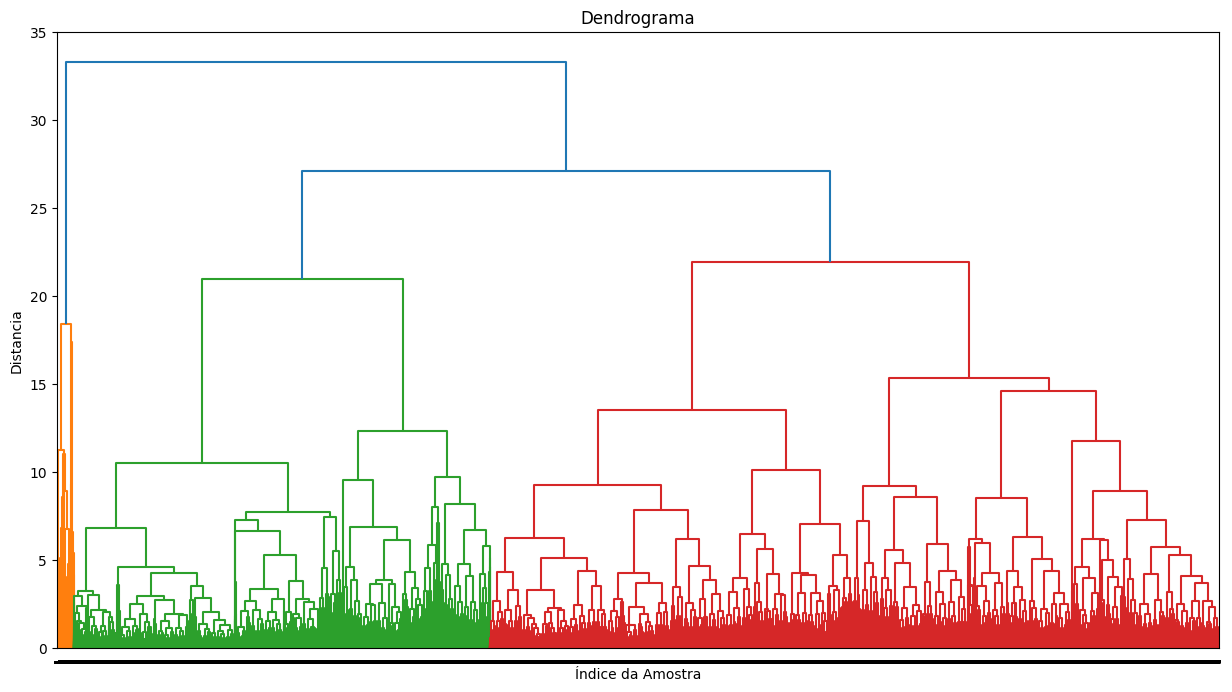

In [15]:
# Plotando o dendrograma do melhor resultado
model = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage)
linkage_matrix = linkage(data_pca, method=best_linkage, metric="euclidean")
plt.figure(figsize=(15, 8))
dendrogram(
    linkage_matrix,
    truncate_mode="level",
    # p=3,
    orientation="top",
    labels=model.fit_predict(data_pca),
)
plt.xlabel("Índice da Amostra")
plt.ylabel("Distancia")
plt.title("Dendrograma")
plt.show()

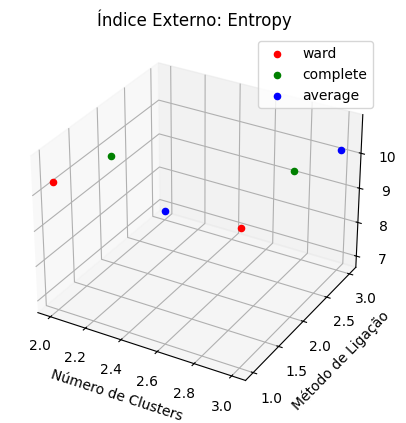

In [36]:
# Mostrando os resultados do Índice Externo: Entropy
n_cluster_exp, linkage_exp, entropy_exp = zip(*entropy_scores)
linkage_exp_map = {"ward": 1, "complete": 2, "average": 3} # Mapeamento de string para numérico
linkage_exp_renew = []
for linkage in linkage_exp:
    linkage_exp_renew.append(linkage_exp_map.get(linkage))

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
color_map = {1: 'r', 2: 'g', 3: 'b'}
linkage_exp_map_labels = {1: "ward", 2: "complete", 3: "average"}

# Lista para rastrear se um rótulo já foi adicionado
added_labels = [False] * len(linkage_exp_renew)

for i in range(len(entropy_scores)):
    # Se o rótulo não foi adicionado, adicione-o; caso contrário, use uma string vazia
    label = linkage_exp_map_labels.get(linkage_exp_renew[i]) if not added_labels[linkage_exp_renew[i] - 1] else ""
    added_labels[linkage_exp_renew[i] - 1] = True
    ax.scatter(n_cluster_exp[i], linkage_exp_renew[i], entropy_exp[i], c=color_map[linkage_exp_renew[i]], marker='o', label=label)

ax.set_xlabel("Número de Clusters")
ax.set_ylabel("Método de Ligação")
ax.set_zlabel("Entropia")
ax.legend()
plt.title("Índice Externo: Entropy")
plt.show()

# ax.scatter(n_cluster_exp, linkage_exp_renew, entropy_exp, marker='o')

---
